In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adadelta, Adam

# loads the MNIST dataset
(x_train, y_train), (x_test, y_test)  = mnist.load_data()

# Lets store the number of rows and columns
img_rows = x_train[0].shape[0]
img_cols = x_train[1].shape[0]

# Getting our date in the right 'shape' needed for Keras
# We need to add a 4th dimenion to our date thereby changing our
# Our original image shape of (60000,28,28) to (60000,28,28,1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

# store the shape of a single image
input_shape = (img_rows, img_cols, 1)

# change our image type to float32 data type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize our data by changing the range from (0 to 255) to (0 to 1)
x_train /= 255
x_test /= 255

# Now we one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]

In [12]:
# create model
model = Sequential()

# 2 sets of CRP (Convolution, RELU, Pooling)
model.add(Conv2D(6, (5, 5),
                 padding = "same", # to set padding at 0, use "valid"
                 input_shape = input_shape))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

model.add(Conv2D(16, (5, 5),
                 padding = "same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

model.add(Conv2D(120, (5, 5),
                 padding = "same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

# Fully connected layers (w/ RELU)
model.add(Flatten())
model.add(Dense(120))
model.add(Activation("relu"))

model.add(Dense(84))
model.add(Activation("relu"))
# Softmax (for classification)
model.add(Dense(num_classes))
model.add(Activation("softmax"))

model.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(),
              metrics = ['accuracy'])

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 activation_12 (Activation)  (None, 28, 28, 6)         0         
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 6)         0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 16)        2416      
                                                                 
 activation_13 (Activation)  (None, 14, 14, 16)        0         
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 7, 7, 16)          0         
 g2D)                                                 

In [13]:
from keras.callbacks import EarlyStopping

# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitoring validation loss
    patience=5,  # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restoring the best weights of the model when training is stopped
)


In [14]:
# Training Parameters
batch_size = 128
epochs = 100

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          callbacks = early_stopping,
          shuffle=True)

model.save("mnist_LeNet.h5")

# Evaluate the performance of our trained model
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Epoch 1/100
469/469 [==============================] - 25s 6ms/step - loss: 0.2775 - accuracy: 0.9136 - val_loss: 0.0843 - val_accuracy: 0.9740
Epoch 2/100
469/469 [==============================] - 3s 5ms/step - loss: 0.0699 - accuracy: 0.9790 - val_loss: 0.0379 - val_accuracy: 0.9873
Epoch 3/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0469 - accuracy: 0.9857 - val_loss: 0.0378 - val_accuracy: 0.9877
Epoch 4/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0363 - accuracy: 0.9884 - val_loss: 0.0342 - val_accuracy: 0.9892
Epoch 5/100
469/469 [==============================] - 3s 5ms/step - loss: 0.0280 - accuracy: 0.9910 - val_loss: 0.0305 - val_accuracy: 0.9898
Epoch 6/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0230 - accuracy: 0.9922 - val_loss: 0.0263 - val_accuracy: 0.9918
Epoch 7/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0189 - accuracy: 0.9938 - val_loss: 0.0233 - val_accuracy: 0.991

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 1s 3ms/step - loss: 0.0233 - accuracy: 0.9917
Test loss: 0.023302599787712097
Test accuracy: 0.9916999936103821


In [15]:
import os

if not os.path.exists("helper_functions.py"):
    !wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
else:
    print("[INFO] 'helper_functions.py' already exists, skipping download.")

[INFO] 'helper_functions.py' already exists, skipping download.


In [16]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, compare_historys


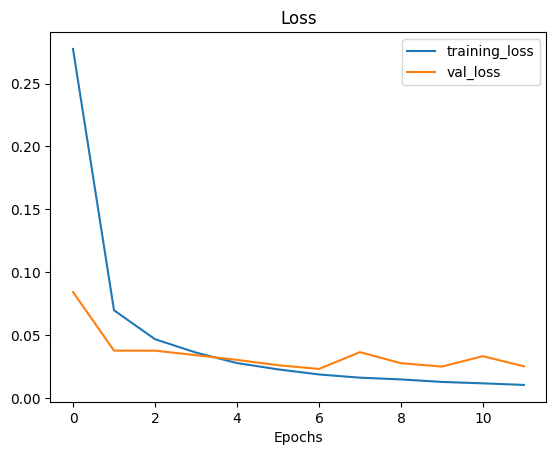

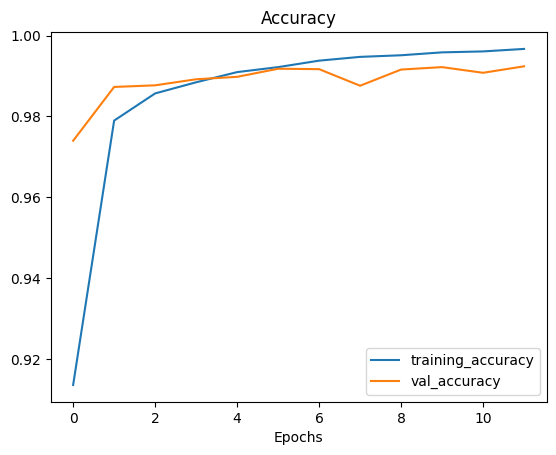

In [17]:
plot_loss_curves(history)


In [20]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Predict classes for test set
y_pred = np.argmax(model.predict(x_test), axis=-1)

# Convert one-hot encoded labels to integers
y_test_int = np.argmax(y_test, axis=1)

# Generate classification report
report = classification_report(y_test_int, y_pred)
print("Classification Report:\n", report)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_int, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Calculate precision, recall, and F1 score from confusion matrix
precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)
recall = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)
f1 = 2 * (precision * recall) / (precision + recall)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


313/313 [==============================] - 2s 5ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

Confusion Matrix:
 [[ 977    0    0    0    0    0    2    1    0    0]
 [   0 1131    0    1    0    0    1    1    1    0]
 [   1    0 1025    2    0    0    1 

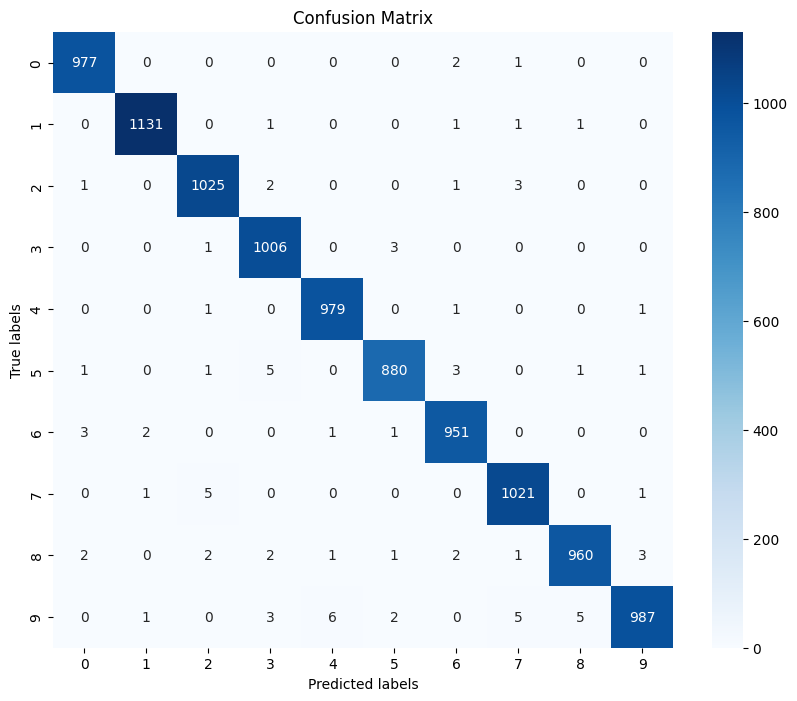

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_int, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [25]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.utils import to_categorical

# Loads the CIFAR dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Display our data shape/dimensions
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Now we one hot encode outputs
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [26]:
l2_reg = 0.001

# Initialize model
model = Sequential()

# 1st Conv Layer
model.add(Conv2D(96, (11, 11), input_shape=x_train.shape[1:],
    padding='same', kernel_regularizer=l2(l2_reg)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2nd Conv Layer
model.add(Conv2D(256, (5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 3rd Conv Layer
model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 4th Conv Layer
model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(1024, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# 5th Conv Layer
model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(1024, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 1st FC Layer
model.add(Flatten())
model.add(Dense(3072))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

# 2nd FC Layer
model.add(Dense(4096))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

# 3rd FC Layer
model.add(Dense(num_classes))
model.add(BatchNormalization())
model.add(Activation('softmax'))

print(model.summary())

model.compile(loss = 'categorical_crossentropy',
              optimizer = Adadelta(),
              metrics = ['accuracy'])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 32, 32, 96)        34944     
                                                                 
 batch_normalization_8 (Bat  (None, 32, 32, 96)        384       
 chNormalization)                                                
                                                                 
 activation_26 (Activation)  (None, 32, 32, 96)        0         
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 16, 16, 96)        0         
 ng2D)                                                           
                                                                 
 conv2d_15 (Conv2D)          (None, 16, 16, 256)       614656    
                                                                 
 batch_normalization_9 (Bat  (None, 16, 16, 256)      

In [27]:
# Training Parameters
batch_size = 64
epochs = 25

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
           callbacks = early_stopping,
          shuffle=True)

model.save("CIFAR10_AlexNet_10_Epoch.h5")

# Evaluate the performance of our trained model
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Epoch 1/25
782/782 [==============================] - 100s 115ms/step - loss: 2.1335 - accuracy: 0.2432 - val_loss: 1.7669 - val_accuracy: 0.3885
Epoch 2/25
782/782 [==============================] - 89s 114ms/step - loss: 1.8501 - accuracy: 0.3401 - val_loss: 1.6695 - val_accuracy: 0.4313
Epoch 3/25
782/782 [==============================] - 88s 113ms/step - loss: 1.7475 - accuracy: 0.3879 - val_loss: 1.6031 - val_accuracy: 0.4614
Epoch 4/25
782/782 [==============================] - 89s 114ms/step - loss: 1.6811 - accuracy: 0.4166 - val_loss: 1.5609 - val_accuracy: 0.4785
Epoch 5/25
782/782 [==============================] - 89s 114ms/step - loss: 1.6315 - accuracy: 0.4357 - val_loss: 1.5211 - val_accuracy: 0.4944
Epoch 6/25
782/782 [==============================] - 88s 113ms/step - loss: 1.5903 - accuracy: 0.4579 - val_loss: 1.4909 - val_accuracy: 0.5044
Epoch 7/25
782/782 [==============================] - 88s 113ms/step - loss: 1.5622 - accuracy: 0.4711 - val_loss: 1.4695 - val_a

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 8s 20ms/step - loss: 1.2693 - accuracy: 0.6065
Test loss: 1.2693381309509277
Test accuracy: 0.6065000295639038


In [28]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Predict classes for test set
y_pred = np.argmax(model.predict(x_test), axis=-1)

# Convert one-hot encoded labels to integers
y_test_int = np.argmax(y_test, axis=1)

# Generate classification report
report = classification_report(y_test_int, y_pred)
print("Classification Report:\n", report)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_int, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Calculate precision, recall, and F1 score from confusion matrix
precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)
recall = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)
f1 = 2 * (precision * recall) / (precision + recall)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


313/313 [==============================] - 6s 18ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.66      0.65      1000
           1       0.71      0.69      0.70      1000
           2       0.52      0.43      0.47      1000
           3       0.43      0.51      0.47      1000
           4       0.52      0.53      0.53      1000
           5       0.57      0.45      0.50      1000
           6       0.67      0.74      0.70      1000
           7       0.68      0.64      0.66      1000
           8       0.69      0.75      0.72      1000
           9       0.64      0.65      0.64      1000

    accuracy                           0.61     10000
   macro avg       0.61      0.61      0.60     10000
weighted avg       0.61      0.61      0.60     10000

Confusion Matrix:
 [[656  24  53  17  22  10  28  14 131  45]
 [ 37 695   5  19  11   5  18   6  54 150]
 [ 80  13 433 111 141  58  82  46  22  14]
 [ 35  11  68

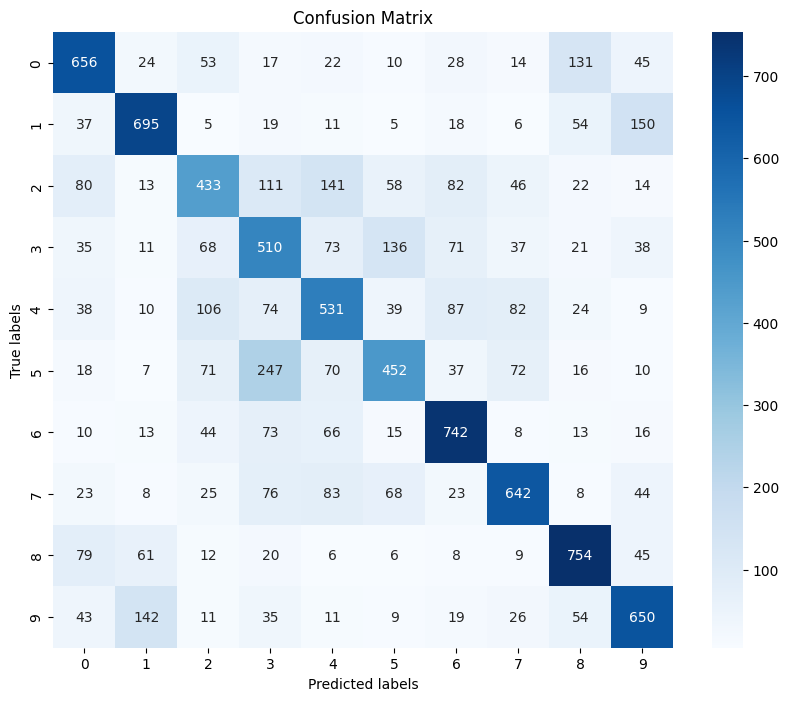

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_int, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
